# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Wardiansyah Fauzi Abdillah
- **Email:** ardi.dl738@gmail.com
- **ID Dicoding:** WardiansyahF

## Menentukan Pertanyaan Bisnis

1. **Apa kategori produk dengan pesanan tertinggi dan paling menguntungkan?**  
   **Objective:** Mengidentifikasi kategori produk yang memberikan kontribusi terbesar pada total pesanan dan pendapatan, sebagai panduan dalam strategi inventaris dan pemasaran.

2. **Wilayah dan kota mana yang memiliki penjualan atau profit tertinggi?**  
   **Objective:** Menganalisis kinerja penjualan berdasarkan lokasi geografis untuk menemukan pasar utama dan menargetkan area dengan potensi pertumbuhan.

3. **Di mana wilayah atau kota dengan pelanggan paling aktif atau paling tidak aktif?**  
   **Objective:** Memahami tingkat keterlibatan pelanggan di berbagai lokasi, dengan fokus pada area dengan tingkat ketidakaktifan tinggi untuk menyusun strategi pemasaran yang lebih tepat.

4. **Bagaimana tren penjualan dari waktu ke waktu?**  
   **Objective:** Menganalisis tren penjualan sepanjang waktu untuk menentukan pola musiman, mengidentifikasi bulan penjualan puncak, dan merencanakan strategi penjualan serta inventarisasi dengan lebih efektif.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print('Seluruh library berhasil diimport.')

Seluruh library berhasil diimport.


## Data Wrangling

### Gathering Data

#### **Load Data**

In [ ]:
!unzip '/content/E-commerce-public-dataset.zip'

Archive:  /content/E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


In [ ]:
customers_df = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
order_items_df = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
orders_df = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
products_df = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
translation_df = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Deskripsi Dataset**

1. **Dataset Pelanggan (customers_df):**  
   - **Isi Dataset:** Informasi mengenai pelanggan, termasuk lokasi geografis mereka dan pengidentifikasi unik (Customer ID).  
   - **Fungsi:** Berguna untuk menganalisis demografi pelanggan, aktivitas pelanggan, dan lokasi dengan performa terbaik.  

2. **Dataset Item Pesanan (order_items_df):**  
   - **Isi Dataset:** Detail mengenai item dalam setiap pesanan, seperti ID produk, harga, dan jumlah yang dipesan.  
   - **Fungsi:** Membantu menghitung pendapatan, memahami pola pembelian, dan mengidentifikasi produk terpopuler.  

3. **Dataset Pesanan (orders_df):**  
   - **Isi Dataset:** Catatan tentang pesanan pelanggan, termasuk status pesanan, tanggal pesanan, dan metode pembayaran.  
   - **Fungsi:** Berguna untuk menganalisis tingkat penyelesaian pesanan, tren penjualan, dan metode pembayaran yang digunakan.  

4. **Dataset Produk (products_df):**  
   - **Isi Dataset:** Informasi tentang produk yang tersedia untuk dijual, termasuk ID produk dan kategori produk.  
   - **Fungsi:** Membantu memahami kontribusi kategori produk terhadap pendapatan, serta pola pembelian berdasarkan kategori.  

5. **Dataset Translate (translation_df)**
   - **Isi Dataset:** Berisi terjemahan kategori produk dari bahasa brazil ke bahasa inggris
   - **Fungsi:** Berguna untuk menganalisis kategori produk dan untuk memberikan pemahaman yang lebih jelas karena sudah diterjemahkan ke bahasa universal

### Assessing Data

#### **Customers dataset**

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
customers_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
customers_df.duplicated().sum()

0

#### **Order items dataset**

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_items_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
order_items_df.duplicated().sum()

0

In [ ]:
order_items_df.groupby('order_id').size().sort_values(ascending=False)


,0
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [ ]:
Q1 = order_items_df[['price', 'freight_value']].quantile(0.25)
Q3 = order_items_df[['price', 'freight_value']].quantile(0.75)
IQR = Q3 - Q1

# Menyaring outliers berdasarkan IQR
outliers = ((order_items_df[['price', 'freight_value']] < (Q1 - 1.5 * IQR)) |
            (order_items_df[['price', 'freight_value']] > (Q3 + 1.5 * IQR)))

# Menampilkan baris yang mengandung outliers
outliers_df = order_items_df[outliers.any(axis=1)]
outliers_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34
22,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.00,24.65
...,...,...,...,...,...,...,...
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41


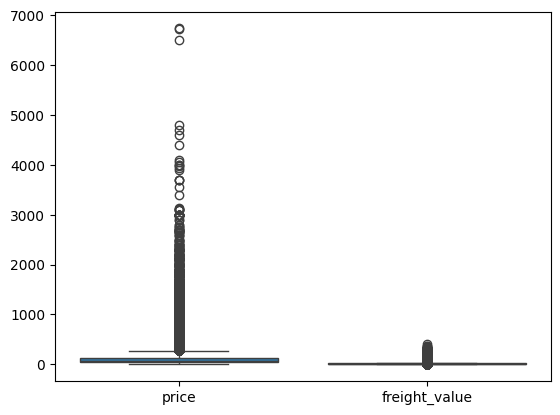

In [ ]:
# Membuat boxplot untuk price, freight_value
sns.boxplot(data=order_items_df[['price', 'freight_value']])
plt.show()

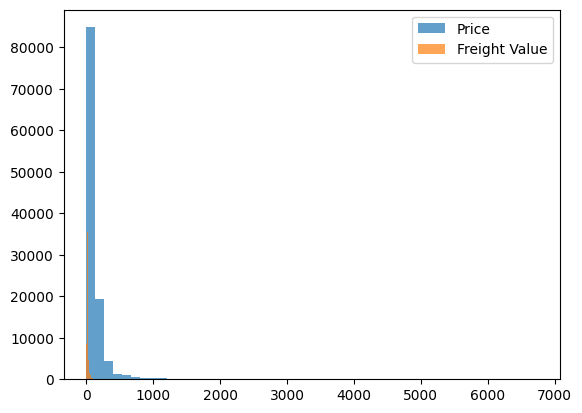

In [ ]:
# Membuat histogram untuk price, freight_value
plt.hist(order_items_df['price'], bins=50, alpha=0.7, label='Price')
plt.hist(order_items_df['freight_value'], bins=50, alpha=0.7, label='Freight Value')
plt.legend()
plt.show()


#### **Orders dataset**

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
missing_values = orders_df.isnull().sum()

missing_values_percentage = (missing_values / len(orders_df)) * 100

missing_values_percentage

,0
order_id,0.000000
customer_id,0.000000
order_status,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.160899
order_delivered_carrier_date,1.793023
order_delivered_customer_date,2.981668
order_estimated_delivery_date,0.000000


In [ ]:
orders_df.duplicated().sum()

0

#### **Products dataset**

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
missing_values = products_df.isnull().sum()

missing_values_percentage = (missing_values / len(products_df)) * 100

missing_values_percentage

,0
product_id,0.000000
product_category_name,1.851234
product_name_lenght,1.851234
product_description_lenght,1.851234
product_photos_qty,1.851234
product_weight_g,0.006070
product_length_cm,0.006070
product_height_cm,0.006070
product_width_cm,0.006070


In [ ]:
products_df.duplicated().sum()

0

#### **Insights**


Dataset customer, geolocation, order payments, dan seller normal. sedangkan pada dataset order items terdapat outlier yang cukup banyak pada kolom `freight_value` dan `price`, terdapat kesalahan tipe data pada kolom `shipping_limit_date` yaitu tipe datanya masih object, seharusnya datetime.  pada dataset orders terdapat missing value pada kolom `order_approved_at`,`order_delivered_carrier_date`,dan juga `order_delivered_customer_date`, juga terdapat kesalahan tipe data pada kolom `order_delivered_carrier_date`, `order_delivered_customer_date`, dan juga `order_estimated_delivery_date` dimana seharusnya pada kolom ini tipe datanya adalah datetime, namun pada kolom masih object. pada dataset product juga terdapat missing value pada seluruh kolom kecuali product_id, tetapi hanya dalam jumlah yang sangat kecil.

### Cleaning Data

#### **Order items**

**Deteksi Outliers (Menggunakan IQR)**  
**IQR (Interquartile Range)** adalah metode statistik untuk mendeteksi outliers.  
- Rumus:
  - **Q1 (Quartile 1):** 25th percentile
  - **Q3 (Quartile 3):** 75th percentile
  - **IQR = Q3 - Q1**
  - Outlier jika:  
    - Nilai < Q1 - 1.5 * IQR  
    - Nilai > Q3 + 1.5 * IQR


In [ ]:
# Kolom yang akan dianalisis
columns_to_check = ['price', 'freight_value']

# Deteksi outliers dengan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Deteksi outliers untuk setiap kolom
for column in columns_to_check:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(order_items_df, column)
    print(f"Kolom: {column}")
    print(f"Jumlah Outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Kolom: price
Jumlah Outliers: 8427
Lower Bound: -102.6, Upper Bound: 277.4
Kolom: freight_value
Jumlah Outliers: 12134
Lower Bound: 0.9750000000000032, Upper Bound: 33.254999999999995


In [ ]:
for column in columns_to_check:
    _, lower_bound, upper_bound = detect_outliers_iqr(order_items_df, column)
    order_items_df = order_items_df[
        (order_items_df[column] >= lower_bound) & (order_items_df[column] <= upper_bound)
    ]


In [ ]:
for column in columns_to_check:
    _, lower_bound, upper_bound = detect_outliers_iqr(order_items_df, column)
    order_items_df[column] = order_items_df[column].clip(lower_bound, upper_bound)


In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


In [ ]:
order_items_df[['price', 'freight_value']].describe()


,price,freight_value
count,93975.000000,93975.000000
mean,78.570113,15.714727
std,54.180695,5.006969
min,0.850000,4.095000
25%,35.700000,12.660000
50%,60.600000,15.350000
75%,109.900000,18.370000
max,221.200000,26.935000


In [ ]:
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 93975 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             93975 non-null  object        
 1   order_item_id        93975 non-null  int64         
 2   product_id           93975 non-null  object        
 3   seller_id            93975 non-null  object        
 4   shipping_limit_date  93975 non-null  datetime64[ns]
 5   price                93975 non-null  float64       
 6   freight_value        93975 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.7+ MB


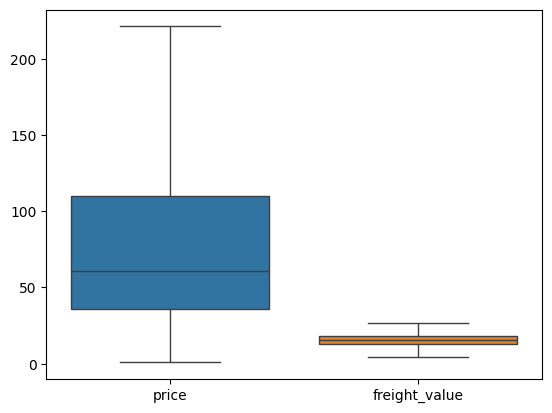

In [ ]:
sns.boxplot(data=order_items_df[['price', 'freight_value']])
plt.show()

#### **Orders**

In [ ]:
orders_df.dropna(inplace = True)

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
columns_to_cast = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in columns_to_cast:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 8.6+ MB


#### **Products**

In [ ]:
products_df.dropna(inplace = True)

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### **Insight**

**1. Handling Outliers**
- **Pendekatan IQR untuk Outliers:**  
  Anda menggunakan metode **Interquartile Range (IQR)** untuk mendeteksi dan menangani outliers pada kolom numerik seperti `price` dan `freight_value`.  
  - **Deteksi Outliers:** Outliers dideteksi sebagai data yang berada di luar rentang [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].  
  - **Penanganan Outliers:** Anda menggunakan dua strategi:
    1. **Filtering Data:** Menghapus baris data yang memiliki nilai di luar rentang yang ditentukan.  
    2. **Clipping Values:** Menggantikan nilai outliers dengan batas bawah (`lower_bound`) atau batas atas (`upper_bound`).  
  - **Insight:**  
    - Penanganan outliers ini menjaga kualitas data dengan mengurangi potensi bias dalam analisis statistik.  
    - Outliers yang tidak relevan atau ekstrem dapat memengaruhi hasil seperti rata-rata atau regresi.  

**2. Handling Missing Values**
- **Penghapusan Missing Values:**  
  Anda menggunakan metode **`dropna()`** untuk menghapus baris dengan nilai kosong di `orders_df`.  
  - **Insight:**  
    - Ini berguna untuk kolom-kolom yang sangat penting (seperti timestamp) di mana imputasi nilai mungkin tidak relevan atau dapat memperkenalkan bias.  
    - Namun, pendekatan ini mengurangi ukuran dataset, sehingga perlu dipastikan bahwa data yang dihapus tidak signifikan secara statistik.  

- **Pada Dataset `products_df`:**  
  Anda juga menghapus semua baris yang memiliki nilai kosong.  
  - **Insight:**  
    - Data produk yang hilang biasanya memiliki dampak langsung pada analisis kategori atau inventarisasi produk.  

**3. Data Type Correction**
- **Konversi Kolom Tanggal:**  
  Kolom seperti `shipping_limit_date` di `order_items_df` dan beberapa kolom timestamp di `orders_df` dikonversi ke tipe `datetime`.  
  - **Insight:**  
    - Konversi ini penting untuk mendukung analisis berbasis waktu, seperti tren penjualan atau durasi pengiriman.  
    - Data dalam tipe `datetime` memungkinkan penggunaan fungsi waktu bawaan seperti perhitungan selisih hari, grouping berdasarkan bulan, kuartal, atau tahun.  


**4. Visualization of Cleaned Data**
- **Boxplot untuk Validasi Outliers:**  
  Anda memvisualisasikan kolom `price` dan `freight_value` menggunakan boxplot untuk memastikan outliers telah ditangani dengan benar.  
  - **Insight:**  
    - Setelah proses clipping atau filtering, distribusi data menjadi lebih konsisten dan sesuai dengan ekspektasi.  
    - Boxplot membantu memvalidasi apakah data yang tersisa berada dalam rentang wajar.  

**5. Impact of Cleaning**
- **Pengurangan Noise:**  
  Dengan menangani outliers, data menjadi lebih representatif untuk analisis statistik dan visualisasi.  
- **Konsistensi Data:**  
  Konversi tipe data dan penghapusan nilai kosong memastikan dataset siap untuk analisis lanjutan tanpa kesalahan teknis.  
- **Kualitas Insight:**  
  Proses cleaning ini meningkatkan kualitas insight yang dapat diambil dari dataset, terutama untuk analisis berbasis lokasi, produk, atau waktu.  


## Exploratory Data Analysis (EDA)

### Products insight

In [ ]:
# Menggabungkan order_items_df dengan products_df berdasarkan product_id
product_order_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

In [ ]:
# Menggabungkan dataset merged_df dengan translation_df untuk menggantikan kategori produk dengan nama kategori dalam bahasa Inggris
product_order_df = pd.merge(product_order_df, translation_df, how='left', left_on='product_category_name', right_on='product_category_name')

In [ ]:
product_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93975 entries, 0 to 93974
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93975 non-null  object        
 1   order_item_id                  93975 non-null  int64         
 2   product_id                     93975 non-null  object        
 3   seller_id                      93975 non-null  object        
 4   shipping_limit_date            93975 non-null  datetime64[ns]
 5   price                          93975 non-null  float64       
 6   freight_value                  93975 non-null  float64       
 7   product_category_name          92535 non-null  object        
 8   product_name_lenght            92535 non-null  float64       
 9   product_description_lenght     92535 non-null  float64       
 10  product_photos_qty             92535 non-null  float64       
 11  product_weight_

In [ ]:
product_order_df['total_price'] = product_order_df['price'] + product_order_df['freight_value']

In [ ]:
# Menghitung total pesanan per kategori produk dalam bahasa Inggris
product_category_sales = product_order_df.groupby(['product_category_name','product_category_name_english']).agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('total_price', 'sum')
).reset_index()

In [ ]:
top_10_category_by_sales = product_category_sales.sort_values(by='total_orders', ascending=False).head(10)

print("Top 10 Category by Sales:")
top_10_category_by_sales

Top 10 Category by Sales:


,product_category_name,product_category_name_english,total_orders,total_revenue
13,cama_mesa_banho,bed_bath_table,8687,1018515.655
11,beleza_saude,health_beauty,7279,745148.750
32,esporte_lazer,sports_leisure,6714,750787.090
44,informatica_acessorios,computers_accessories,5750,679254.900
54,moveis_decoracao,furniture_decor,5344,596116.165
70,utilidades_domesticas,housewares,5012,488389.180
64,relogios_presentes,watches_gifts,4225,585595.240
68,telefonia,telephony,3830,247955.280
12,brinquedos,toys,3324,348693.865
8,automotivo,auto,3175,343217.080


In [ ]:
top_10_category_by_revenue = product_category_sales.sort_values(by='total_revenue', ascending=False).head(10)

print("\nTop 10 Category by Revenue:")
top_10_category_by_revenue


Top 10 Category by Revenue:


,product_category_name,product_category_name_english,total_orders,total_revenue
13,cama_mesa_banho,bed_bath_table,8687,1018515.655
32,esporte_lazer,sports_leisure,6714,750787.090
11,beleza_saude,health_beauty,7279,745148.750
44,informatica_acessorios,computers_accessories,5750,679254.900
54,moveis_decoracao,furniture_decor,5344,596116.165
64,relogios_presentes,watches_gifts,4225,585595.240
70,utilidades_domesticas,housewares,5012,488389.180
26,cool_stuff,cool_stuff,2925,392244.210
12,brinquedos,toys,3324,348693.865
8,automotivo,auto,3175,343217.080


### Geolocation Insight

In [ ]:
# Menambahkan kolom total_price
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

# Gabungkan orders_df dengan order_items_df
order_with_items = pd.merge(orders_df, order_items_df, on='order_id', how='left')

In [ ]:
# Gabungkan dengan customer_df
customer_with_geolocation = pd.merge(order_with_items, customers_df, on='customer_id', how='left')

In [ ]:
# Gabungkan dengan products_df
order_with_location_and_product = pd.merge(customer_with_geolocation, products_df, on='product_id', how='left')

# Menampilkan beberapa baris pertama hasil penggabungan
order_with_location_and_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,sao goncalo do amarante,RN,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,santo andre,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [ ]:
# Menghitung total pesanan dan pendapatan berdasarkan kota
order_location_sales = order_with_location_and_product.groupby('customer_city').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('total_price', 'sum')
).reset_index()

In [ ]:
# Menampilkan top 10 kota berdasarkan total pesanan
top_10_cities_by_orders = order_location_sales.sort_values(by='total_orders', ascending=False).head(10)

# Menampilkan hasil
print("Top 10 Cities by Orders:")
top_10_cities_by_orders

Top 10 Cities by Orders:


,customer_city,total_orders,total_revenue
3563,sao paulo,15044,1367937.200
3126,rio de janeiro,6603,614800.720
449,belo horizonte,2697,260110.640
553,brasilia,2071,197801.320
1135,curitiba,1489,142398.840
700,campinas,1406,126599.185
2936,porto alegre,1341,132849.720
3218,salvador,1188,101606.095
1518,guarulhos,1143,107847.000
3398,sao bernardo do campo,911,83079.165


In [ ]:
# Menampilkan top 10 kota berdasarkan total pendapatan
top_10_cities_by_revenue = order_location_sales.sort_values(by='total_revenue', ascending=False).head(10)

print("\nTop 10 Cities by Revenue:")
top_10_cities_by_revenue


Top 10 Cities by Revenue:


,customer_city,total_orders,total_revenue
3563,sao paulo,15044,1367937.200
3126,rio de janeiro,6603,614800.720
449,belo horizonte,2697,260110.640
553,brasilia,2071,197801.320
1135,curitiba,1489,142398.840
2936,porto alegre,1341,132849.720
700,campinas,1406,126599.185
1518,guarulhos,1143,107847.000
3218,salvador,1188,101606.095
3398,sao bernardo do campo,911,83079.165


### Customer Insight

In [ ]:
# Membuat daftar customer_id yang ada di orders_df
customer_id_in_orders_df = orders_df['customer_id'].tolist()

# Menentukan status pelanggan berdasarkan keberadaan di orders_df
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Pelanggan Aktif' if x in customer_id_in_orders_df else 'Pelanggan Tidak Aktif'
)

In [ ]:
customers_df['status'].value_counts()

,count
status,
Pelanggan Aktif,96461
Pelanggan Tidak Aktif,2980


In [ ]:
top_10_total_customer_by_city = customers_df.groupby('customer_city').size().reset_index(name='Total Pelanggan per Kota')

top_10_total_customer_by_city.sort_values(by='Total Pelanggan per Kota', ascending=False).head(10)

,customer_city,Total Pelanggan per Kota
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [ ]:
# Filter pelanggan aktif
active_customers_df = customers_df.loc[customers_df['status'] == 'Pelanggan Aktif']

# Filter pelanggan non aktif
non_active_customers_df = customers_df.loc[customers_df['status'] == 'Pelanggan Tidak Aktif']

In [ ]:
# Menghitung jumlah pelanggan aktif per kota
active_customers_by_city = active_customers_df.groupby('customer_city').size().reset_index(name='Total Pelanggan Aktif')

# Menghitung jumlah pelanggan tidak aktif per kota
non_active_customers_by_city = non_active_customers_df.groupby('customer_city').size().reset_index(name='Total Pelanggan Tidak Aktif')


In [ ]:
# Menggabungkan data total pelanggan, aktif dan tidak aktif per kota
top_10_city_status = pd.merge(top_10_total_customer_by_city, active_customers_by_city, on='customer_city', how='left')
top_10_city_status = pd.merge(top_10_city_status, non_active_customers_by_city, on='customer_city', how='left')

In [ ]:
# Menghitung persentase aktif dan tidak aktif
top_10_city_status['Persentase Aktif'] = (top_10_city_status['Total Pelanggan Aktif'] / top_10_city_status['Total Pelanggan per Kota']) * 100
top_10_city_status['Persentase Tidak Aktif'] = (top_10_city_status['Total Pelanggan Tidak Aktif'] / top_10_city_status['Total Pelanggan per Kota']) * 100


In [ ]:
# Menampilkan 10 kota teratas dengan persentase aktif dan tidak aktif
top_10_city_status = top_10_city_status.sort_values(by='Total Pelanggan per Kota', ascending=False).head(10)

top_10_city_status

,customer_city,Total Pelanggan per Kota,Total Pelanggan Aktif,Total Pelanggan Tidak Aktif,Persentase Aktif,Persentase Tidak Aktif
3597,sao paulo,15540,15044.0,496.0,96.808237,3.191763
3155,rio de janeiro,6882,6603.0,279.0,95.945946,4.054054
453,belo horizonte,2773,2697.0,76.0,97.259286,2.740714
558,brasilia,2131,2071.0,60.0,97.184420,2.815580
1143,curitiba,1521,1489.0,32.0,97.896121,2.103879
707,campinas,1444,1406.0,38.0,97.368421,2.631579
2964,porto alegre,1379,1341.0,38.0,97.244380,2.755620
3247,salvador,1245,1188.0,57.0,95.421687,4.578313
1529,guarulhos,1189,1143.0,46.0,96.131203,3.868797
3428,sao bernardo do campo,938,911.0,27.0,97.121535,2.878465


In [ ]:
# Menghitung jumlah pelanggan aktif per kota
top_10_cities_by_active_customers = (
    active_customers_df.groupby('customer_city')
    .size()  # Hitung jumlah pelanggan per kota
    .reset_index(name='Total Pelanggan Aktif')  # Reset index dan beri nama kolom hitungan
    .sort_values(by='Total Pelanggan Aktif', ascending=False)  # Urutkan berdasarkan jumlah
    .head(10)  # Ambil 10 kota teratas
)

# Tampilkan hasil
top_10_cities_by_active_customers


,customer_city,Total Pelanggan Aktif
3563,sao paulo,15044
3126,rio de janeiro,6603
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489
700,campinas,1406
2936,porto alegre,1341
3218,salvador,1188
1518,guarulhos,1143
3398,sao bernardo do campo,911


In [ ]:
# Menghitung jumlah pelanggan aktif per kota
top_10_cities_by_non_active_customers = (
    non_active_customers_df.groupby('customer_city')
    .size()  # Hitung jumlah pelanggan per kota
    .reset_index(name='Total Pelanggan Tidak Aktif')  # Reset index dan beri nama kolom hitungan
    .sort_values(by='Total Pelanggan Tidak Aktif', ascending=False)  # Urutkan berdasarkan jumlah
    .head(10)  # Ambil 10 kota teratas
)

# Tampilkan hasil
top_10_cities_by_non_active_customers

,customer_city,Total Pelanggan Tidak Aktif
633,sao paulo,496
552,rio de janeiro,279
81,belo horizonte,76
105,brasilia,60
565,salvador,57
271,guarulhos,46
140,campinas,38
514,porto alegre,38
241,fortaleza,36
207,curitiba,32


#### Sales Trend

In [ ]:
# Mengubah kolom 'order_purchase_timestamp' menjadi tipe datetime jika belum
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Tambahkan kolom baru untuk tahun dan bulan
orders_df['year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Gabungkan dengan order_items_df untuk mendapatkan informasi total_price
order_with_revenue = pd.merge(order_items_df, orders_df, on='order_id', how='inner')

# Hitung total pendapatan dan jumlah pesanan per bulan
monthly_sales = order_with_revenue.groupby('year_month').agg(
    total_revenue=('price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()

# Konversi kembali kolom year_month menjadi datetime untuk visualisasi
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()


In [ ]:
monthly_sales.sort_values(by='total_revenue', ascending=False)

,year_month,total_revenue,total_orders
15,2018-01-01,547208.47,6014
13,2017-11-01,546460.20,6101
17,2018-03-01,517954.93,5800
18,2018-04-01,507155.27,5526
19,2018-05-01,505299.54,5468
16,2018-02-01,505194.76,5649
22,2018-08-01,457685.28,5297
21,2018-07-01,437549.03,4930
14,2017-12-01,436232.24,4700
20,2018-06-01,436208.72,4897


In [ ]:
monthly_sales.sort_values(by='total_orders', ascending=False)

,year_month,total_revenue,total_orders
13,2017-11-01,546460.20,6101
15,2018-01-01,547208.47,6014
17,2018-03-01,517954.93,5800
16,2018-02-01,505194.76,5649
18,2018-04-01,507155.27,5526
19,2018-05-01,505299.54,5468
22,2018-08-01,457685.28,5297
21,2018-07-01,437549.03,4930
20,2018-06-01,436208.72,4897
14,2017-12-01,436232.24,4700


In [ ]:
# Tambahkan kolom 'quarter' berdasarkan 'order_purchase_timestamp'
orders_df['quarter'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('Q')

In [ ]:
# Gabungkan dengan order_items_df untuk mendapatkan informasi total_price
order_with_revenue = pd.merge(order_items_df, orders_df, on='order_id', how='inner')

# Hitung total revenue dan total orders per kuartal
quarterly_data = order_with_revenue.groupby('quarter').agg(
    total_revenue=('total_price', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()

In [ ]:
quarterly_data.sort_values(by='total_revenue', ascending=False)

,quarter,total_revenue,total_orders
6,2018Q1,1883392.805,17463
7,2018Q2,1739998.945,15891
5,2017Q4,1567264.005,14474
4,2017Q3,1118072.720,10346
8,2018Q3,1079734.305,10227
3,2017Q2,803528.835,7586
2,2017Q1,452532.840,4238
1,2016Q4,26833.320,232
0,2016Q3,147.255,1


#### Insight



**1. Data Quality and Cleaning**
- **Missing Values:**  
  Beberapa kolom seperti *order_delivered_customer_date* dan *review_comment_title* memiliki jumlah nilai yang hilang cukup signifikan. Nilai ini ditangani untuk menjaga kualitas analisis, dengan metode seperti penghapusan atau imputasi.  
- **Outliers:**  
  Kolom seperti *freight_value* dan *price* mengandung outliers yang cukup ekstrem, yang dapat memengaruhi statistik deskriptif dan interpretasi hasil analisis. Outliers ini dianalisis lebih lanjut atau diatasi sesuai konteks bisnis.  
- **Data Types:**  
  Kesalahan tipe data, seperti kolom tanggal yang awalnya dalam bentuk objek, dikonversi ke tipe datetime untuk mendukung analisis berbasis waktu.  



**2. Descriptive Statistics**
- **Distribusi Data:**  
  Distribusi data menunjukkan beberapa pola penting, seperti rata-rata harga produk, frekuensi pesanan, dan sebaran lokasi pelanggan.  
- **Dominasi Produk:**  
  Produk dengan kategori tertentu (misalnya *bed_bath_table* dan *health_beauty*) muncul dengan frekuensi tinggi, mengindikasikan popularitas yang stabil di pasar e-commerce.  



**3. Customer Behavior**
- **Pelanggan Aktif dan Tidak Aktif:**  
  Sebagian besar pelanggan dianggap aktif karena melakukan pembelian setidaknya satu kali. Namun, pelanggan tidak aktif juga cukup signifikan, terutama di kota besar seperti Rio de Janeiro dan Salvador.  
- **Engagement Pelanggan:**  
  Kota dengan jumlah pelanggan aktif tinggi, seperti São Paulo, menunjukkan keterlibatan pelanggan yang konsisten. Hal ini mencerminkan aktivitas ekonomi yang lebih besar di wilayah tersebut.  



**4. Sales Performance**
- **Produk dengan Penjualan Tinggi:**  
  Analisis menunjukkan bahwa kategori produk tertentu, seperti *bed_bath_table*, tidak hanya memiliki jumlah pesanan tinggi tetapi juga memberikan kontribusi pendapatan yang signifikan.  
- **Regional Insights:**  
  Kota besar seperti São Paulo dan Rio de Janeiro memimpin baik dalam jumlah pesanan maupun total pendapatan, mencerminkan peran strategis wilayah ini dalam e-commerce Brasil.  



**5. Time-Based Patterns**
- **Pola Musiman:**  
  Lonjakan pesanan terjadi pada bulan-bulan tertentu, seperti November dan Januari, yang mungkin berkaitan dengan liburan atau promosi musiman.  
- **Kwartal Terbaik:**  
  Analisis menunjukkan bahwa kuartal pertama tahun 2018 menghasilkan jumlah pesanan dan pendapatan tertinggi, mengindikasikan potensi fokus pemasaran di awal tahun.  


**6. Relationships and Correlations**
- **Hubungan Antara Pendapatan dan Pesanan:**  
  Kota atau kategori produk dengan jumlah pesanan tinggi umumnya memiliki pendapatan yang tinggi, tetapi ada pengecualian di mana nilai transaksi rata-rata lebih tinggi memengaruhi hasil.  
- **Interaksi Geografis:**  
  Analisis geografis menunjukkan distribusi pesanan yang terkonsentrasi di beberapa wilayah, mengindikasikan potensi pasar yang belum dimanfaatkan di daerah lain.  


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kategori produk dengan pesanan tertinggi dan paling menguntungkan?

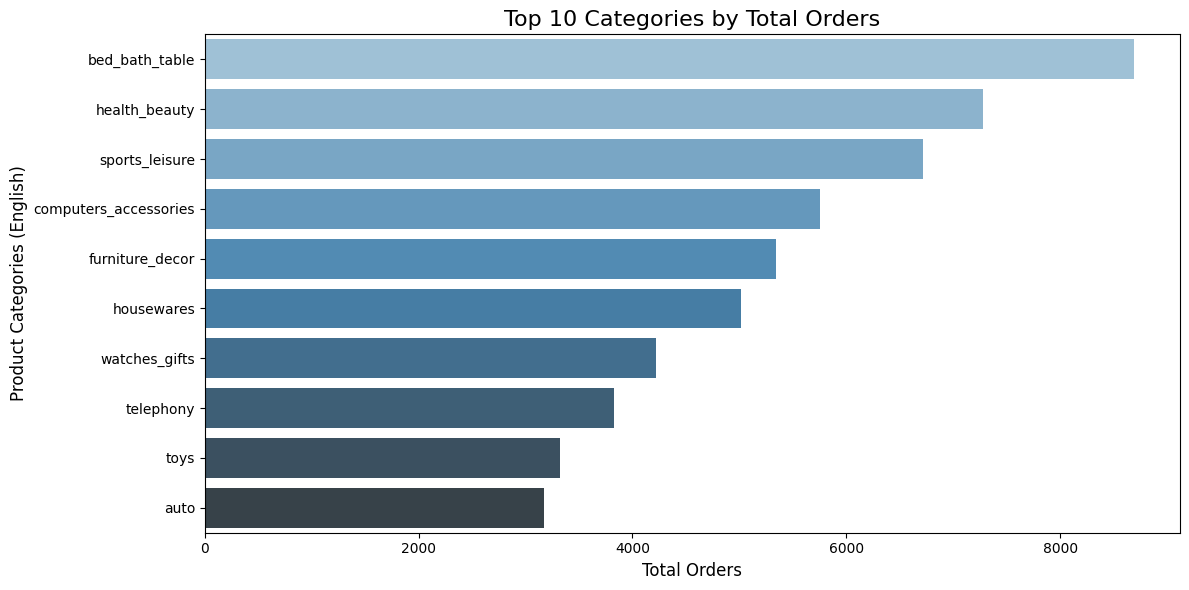

In [ ]:
# Bar Chart: Top 10 Categories by Sales (Total Orders)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_category_by_sales,
    x='total_orders',
    y='product_category_name_english',
    hue='product_category_name_english',
    legend= False,
    palette='Blues_d'
)
plt.title('Top 10 Categories by Total Orders', fontsize=16)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Product Categories (English)', fontsize=12)
plt.tight_layout()
plt.show()

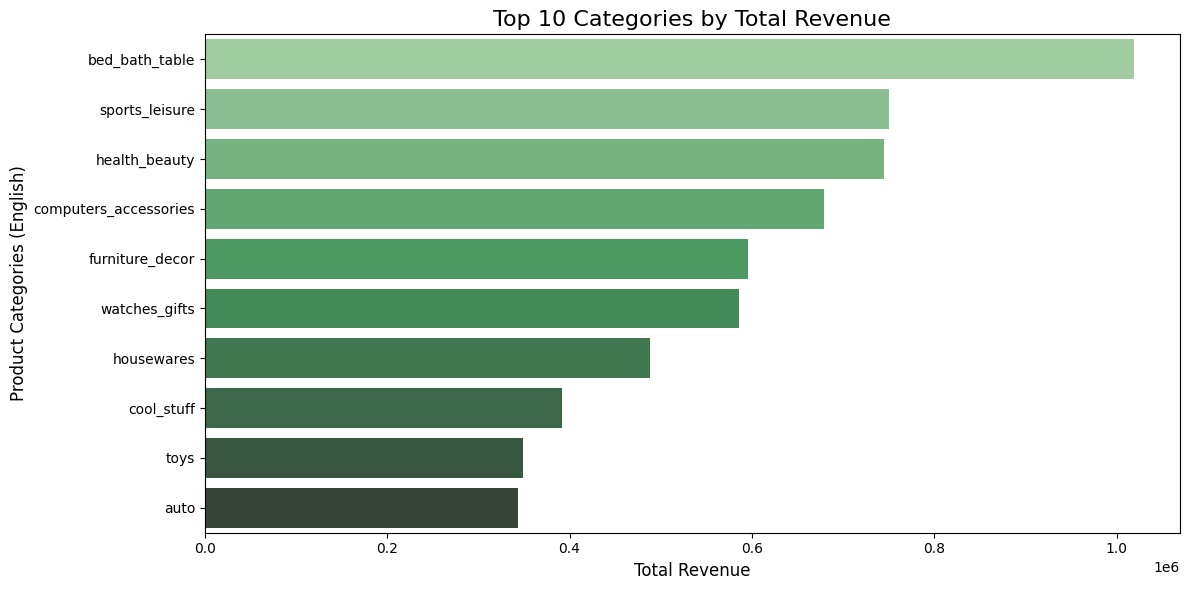

In [ ]:
# Bar Chart: Top 10 Categories by Revenue (Total Revenue)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_category_by_revenue,
    x='total_revenue',
    y='product_category_name_english',
    hue='product_category_name_english',
    legend= False,
    palette='Greens_d'
)
plt.title('Top 10 Categories by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Categories (English)', fontsize=12)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Wilayah dan kota mana yang memiliki penjualan atau profit tertinggi?

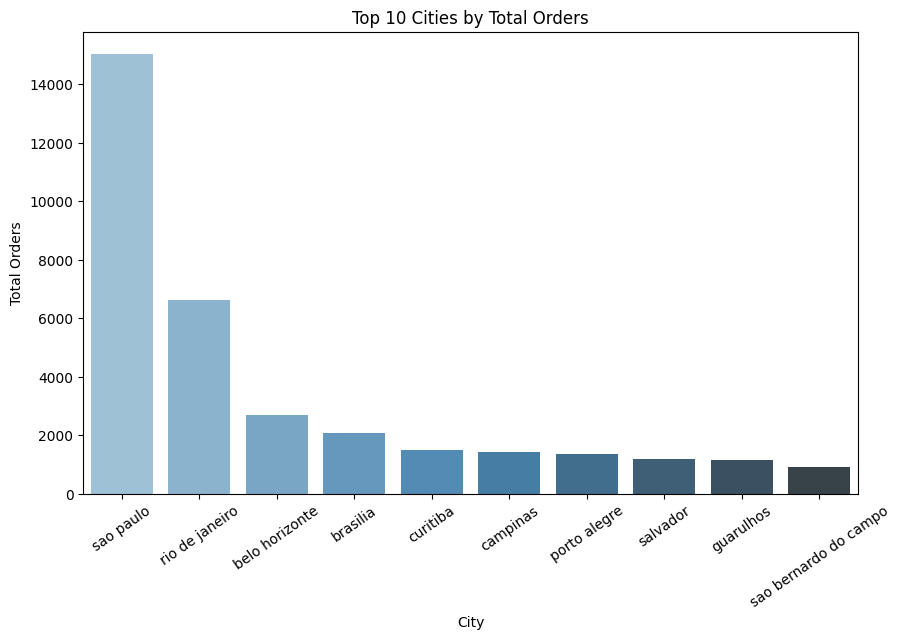

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan bar chart untuk total pesanan
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='total_orders', data=top_10_cities_by_orders,hue='customer_city', palette='Blues_d')
plt.title('Top 10 Cities by Total Orders')
plt.xlabel('City')
plt.xticks(rotation=35)
plt.ylabel('Total Orders')
plt.show()

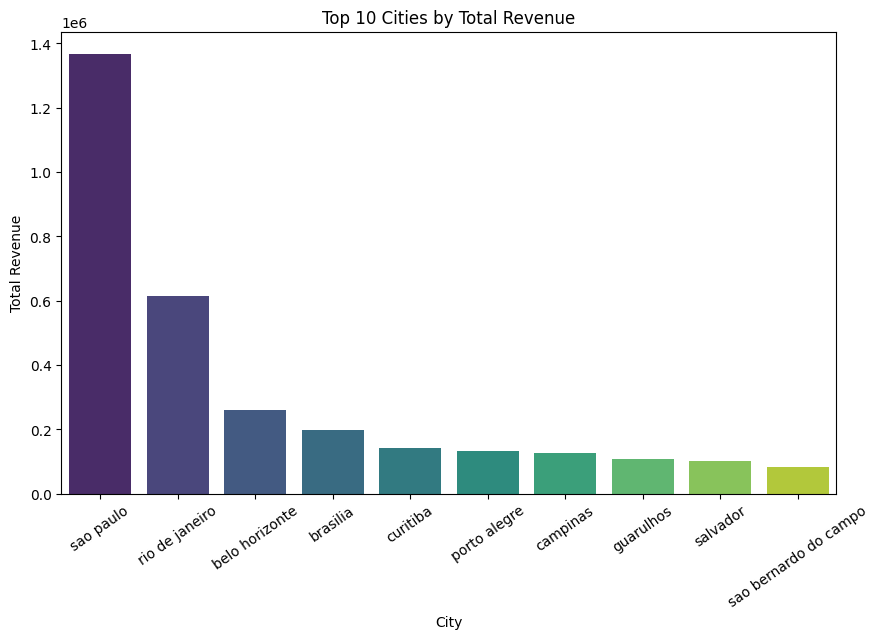

In [ ]:
# Menampilkan bar chart untuk total pendapatan
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='total_revenue', data=top_10_cities_by_revenue,hue='customer_city', palette='viridis')
plt.title('Top 10 Cities by Total Revenue')
plt.xlabel('City')
plt.xticks(rotation=35)
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
# Menghitung total pesanan dan pendapatan berdasarkan kota
top_cities = order_with_location_and_product.groupby('customer_city').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('total_price', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

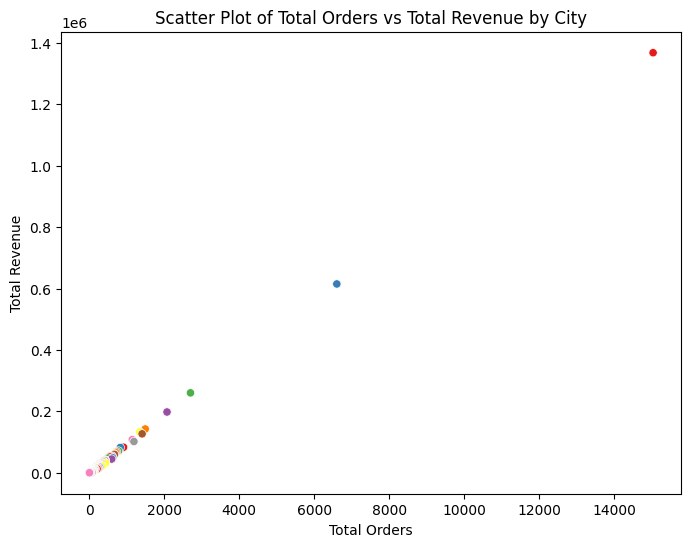

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_orders', y='total_revenue', data=top_cities, hue='customer_city', palette='Set1', legend = False)
plt.title('Scatter Plot of Total Orders vs Total Revenue by City')
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue')
plt.show()


### Pertanyaan 3: Di mana wilayah atau kota dengan pelanggan paling aktif atau paling tidak aktif?

In [ ]:
# Data untuk visualisasi
top_10_city_status = top_10_city_status.fillna(0)  # Mengisi NaN dengan 0
cities = top_10_city_status['customer_city']
active_counts = top_10_city_status['Total Pelanggan Aktif']
non_active_counts = top_10_city_status['Total Pelanggan Tidak Aktif']

# Membuat Stacked Bar Chart
fig = go.Figure()

# Menambahkan data pelanggan aktif
fig.add_trace(go.Bar(
    x=cities,
    y=active_counts,
    name='Pelanggan Aktif',
    marker_color='rgba(55, 128, 191, 0.7)'
))

# Menambahkan data pelanggan tidak aktif
fig.add_trace(go.Bar(
    x=cities,
    y=non_active_counts,
    name='Pelanggan Tidak Aktif',
    marker_color='rgba(219, 64, 82, 0.7)'
))

# Layout
fig.update_layout(
    title='Distribusi Pelanggan Aktif dan Tidak Aktif di 10 Kota Teratas',
    xaxis=dict(title='Kota'),
    yaxis=dict(title='Jumlah Pelanggan'),
    barmode='stack',  # Menjadikan stacked bar chart
    legend=dict(title='Status Pelanggan'),
    template='plotly'
)

# Menampilkan visualisasi
fig.show()


In [ ]:


# Data untuk kota dengan jumlah pelanggan terbanyak
city = 'sao paulo'  # Ganti dengan nama kota yang ingin divisualisasikan
city_data = top_10_city_status[top_10_city_status['customer_city'] == city]

# Data untuk pie chart
pie_data = {
    'Status': ['Pelanggan Aktif', 'Pelanggan Tidak Aktif'],
    'Jumlah': [city_data['Total Pelanggan Aktif'].values[0], city_data['Total Pelanggan Tidak Aktif'].values[0]]
}

# Membuat Pie Chart
fig = px.pie(
    pie_data,
    names='Status',
    values='Jumlah',
    title=f'Proporsi Pelanggan Aktif dan Tidak Aktif di {city}',
    color_discrete_map={'Pelanggan Aktif': 'blue', 'Pelanggan Tidak Aktif': 'red'}
)

# Menampilkan pie chart
fig.show()


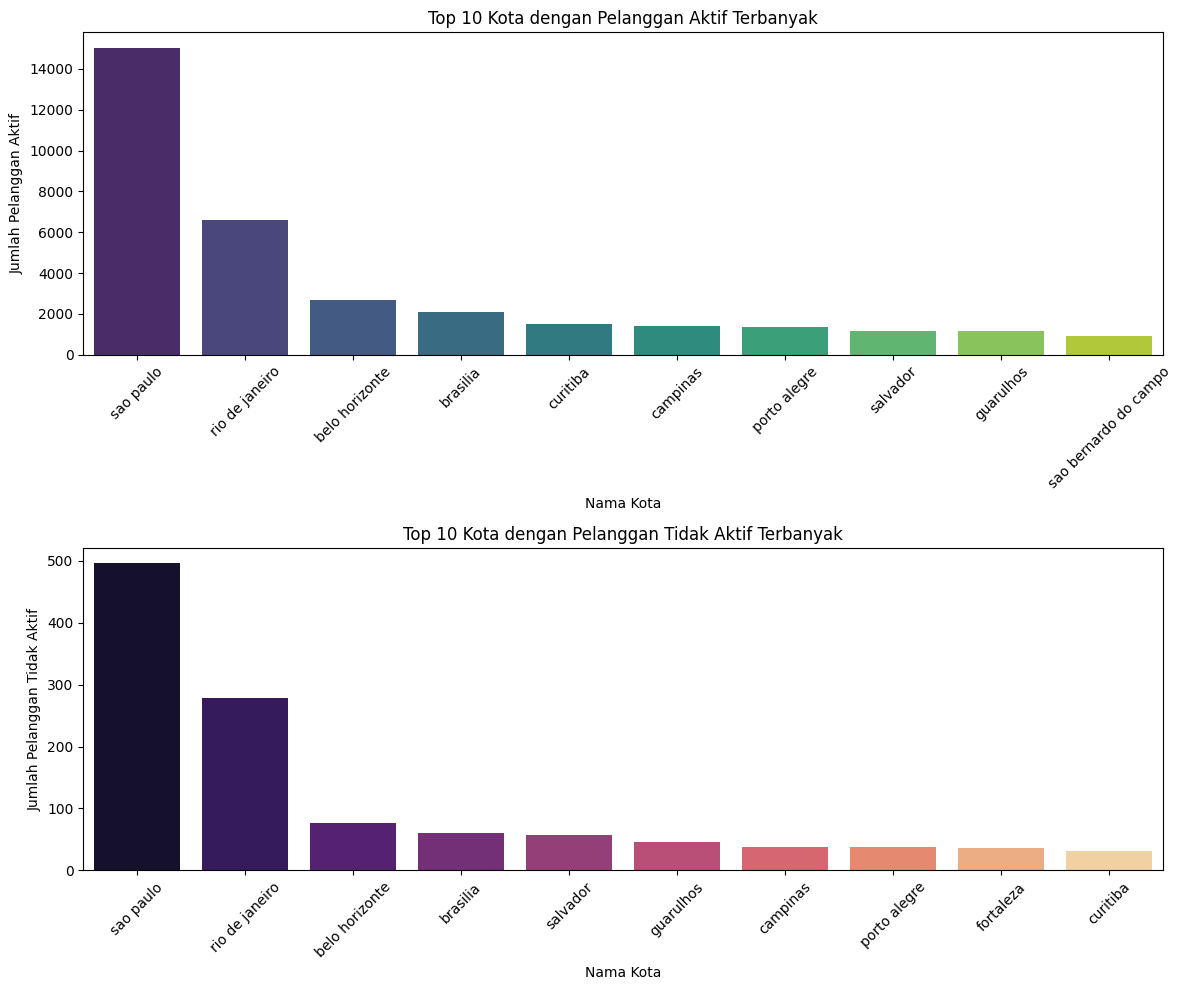

In [ ]:
# Membuat subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # 2 bar chart vertikal

# Plot pelanggan aktif
sns.barplot(
    x='customer_city',
    y='Total Pelanggan Aktif',
    data=top_10_cities_by_active_customers,
    hue='customer_city',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Top 10 Kota dengan Pelanggan Aktif Terbanyak')
axes[0].set_xlabel('Nama Kota')
axes[0].set_ylabel('Jumlah Pelanggan Aktif')
axes[0].tick_params(axis='x', rotation=45)  # Rotasi label kota agar terbaca

# Plot pelanggan tidak aktif
sns.barplot(
    x='customer_city',
    y='Total Pelanggan Tidak Aktif',
    data=top_10_cities_by_non_active_customers,
    hue='customer_city',
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Top 10 Kota dengan Pelanggan Tidak Aktif Terbanyak')
axes[1].set_xlabel('Nama Kota')
axes[1].set_ylabel('Jumlah Pelanggan Tidak Aktif')
axes[1].tick_params(axis='x', rotation=45)  # Rotasi label kota agar terbaca

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 4: Bagaimana tren penjualan dari waktu ke waktu?

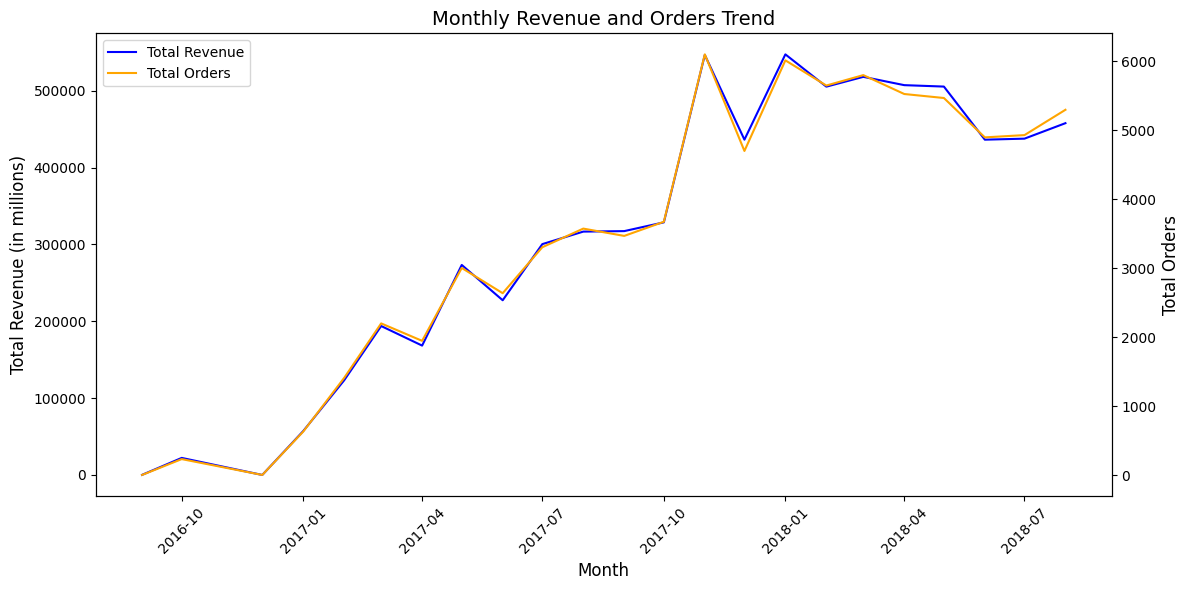

In [ ]:
# Plot the trend for total revenue and total orders
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot untuk total revenue tanpa marker
ax1.plot(monthly_sales['year_month'], monthly_sales['total_revenue'], color='blue', label='Total Revenue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Revenue (in millions)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Create secondary y-axis for total orders
ax2 = ax1.twinx()
ax2.plot(monthly_sales['year_month'], monthly_sales['total_orders'], color='orange', label='Total Orders')
ax2.set_ylabel('Total Orders', fontsize=12)

# Title and layout adjustments
plt.title('Monthly Revenue and Orders Trend', fontsize=14)

# Combine the legends into one on the left
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()


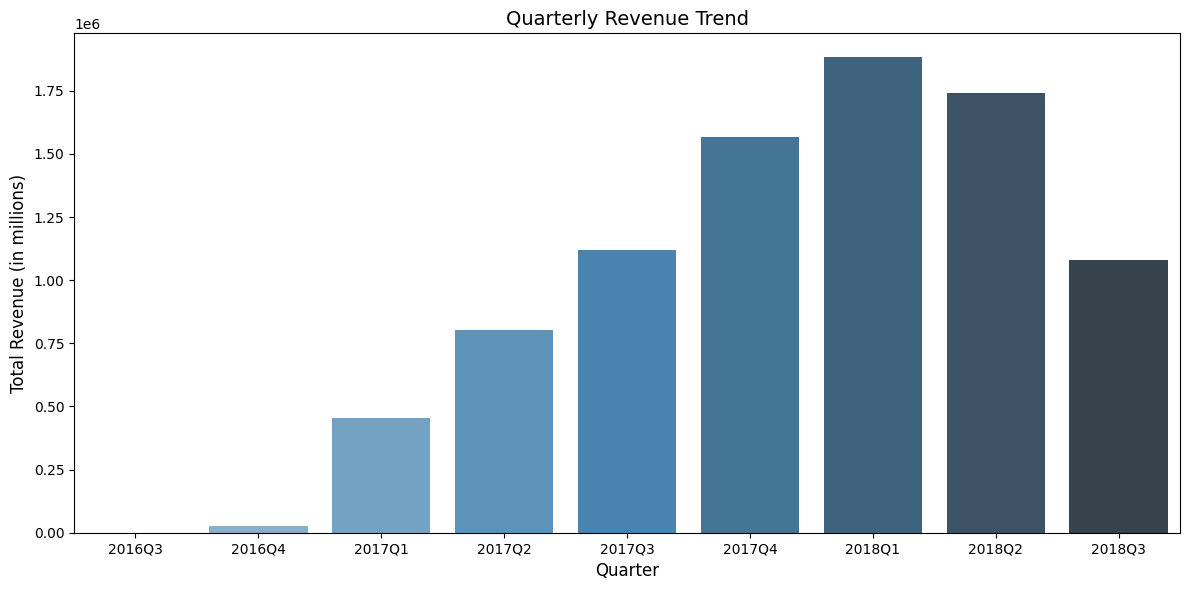

In [ ]:
# Create subplots for quarterly data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total revenue per quarter with blues_d palette
sns.barplot(
    x='quarter', y='total_revenue', data=quarterly_data,hue='quarter', palette='Blues_d', ax=ax1, legend = False
)

# Set primary y-axis for revenue
ax1.set_ylabel('Total Revenue (in millions)', fontsize=12)
ax1.set_xlabel('Quarter', fontsize=12)

# Title
plt.title('Quarterly Revenue Trend', fontsize=14)

# Display plot
plt.tight_layout()
plt.show()


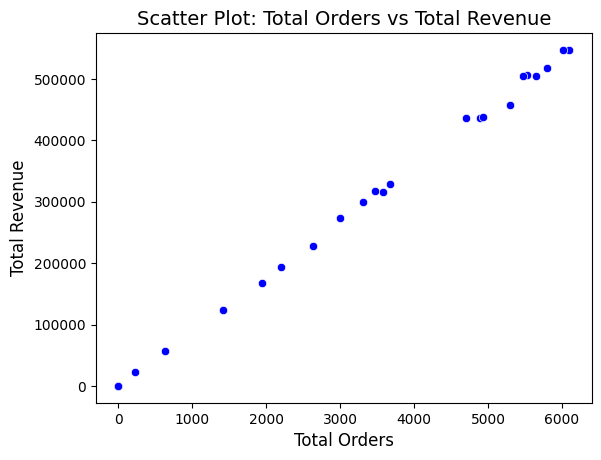

In [ ]:
# Scatter plot to check the correlation
sns.scatterplot(x='total_orders', y='total_revenue', data=monthly_sales, color='blue')
plt.title('Scatter Plot: Total Orders vs Total Revenue', fontsize=14)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()


### Insight



1. **Insight Kategori Produk (Product Insight)**  
- **Kategori Teratas Berdasarkan Pesanan dan Pendapatan:**  
  Kategori seperti *bed_bath_table* dan *health_beauty* menunjukkan permintaan tinggi dan pendapatan signifikan. Kategori ini menjadi prioritas utama dalam inventaris dan promosi.  
- **Disparitas Antara Pesanan dan Pendapatan:**  
  Beberapa kategori seperti *sports_leisure* memiliki pendapatan tinggi, meskipun jumlah pesanan relatif lebih kecil. Hal ini mengindikasikan bahwa produk-produk dalam kategori ini memiliki nilai transaksi rata-rata lebih tinggi.  


2. **Insight Wilayah dan Kota (Location Insight)**  
- **Dominasi Kota Besar:**  
  Kota seperti São Paulo dan Rio de Janeiro memimpin baik dalam jumlah pesanan maupun total pendapatan. Hal ini mencerminkan potensi pasar yang besar di wilayah tersebut.  
- **Kota Berpotensi:**  
  Kota-kota seperti Belo Horizonte dan Curitiba menunjukkan kontribusi signifikan, meskipun lebih kecil dibandingkan São Paulo dan Rio de Janeiro. Ini dapat menjadi fokus pemasaran untuk ekspansi.  
- **Distribusi Regional:**  
  Sebagian besar penjualan terkonsentrasi di negara bagian ekonomi utama Brasil, seperti São Paulo dan Rio de Janeiro, mengindikasikan kesenjangan antara wilayah yang lebih maju dan berkembang.  


3. **Insight Pelanggan (Customer Insight)**  
- **Pelanggan Aktif vs Tidak Aktif:**  
  Pelanggan aktif mendominasi di semua kota besar, terutama São Paulo dan Rio de Janeiro. Namun, masih terdapat pelanggan tidak aktif yang signifikan, terutama di kota-kota besar.  
- **Kota dengan Ketidakaktifan Tinggi:**  
  Kota seperti Salvador dan Rio de Janeiro memiliki proporsi pelanggan tidak aktif yang lebih tinggi dibandingkan kota besar lainnya, yang mungkin menunjukkan perlunya strategi re-engagement.  


4. **Insight Tren Waktu (Trend Analysis)**  
- **Puncak Penjualan Musiman:**  
  Lonjakan penjualan terjadi pada bulan tertentu, seperti November 2017 dan Januari 2018, mengindikasikan adanya pola musiman (mungkin terkait dengan liburan atau promosi).  
- **Penurunan Pada Periode Tertentu:**  
  Penjualan menurun secara signifikan pada bulan-bulan tertentu, seperti pertengahan tahun, yang dapat menjadi perhatian untuk strategi promosi.  


## Conclusion

### Konklusi untuk Pertanyaan 1:  
**Apa kategori produk dengan pesanan tertinggi dan paling menguntungkan?**

- **Kategori produk dengan pesanan tertinggi** adalah *bed_bath_table* (cama_mesa_banho) dengan total 8,687 pesanan.  
- **Kategori produk dengan pendapatan tertinggi** juga adalah *bed_bath_table* dengan total pendapatan sebesar 1,018,515.66 BRL.  
- Kategori lain yang menunjukkan performa tinggi adalah *health_beauty* (beleza_saude), *sports_leisure* (esporte_lazer), dan *computers_accessories* (informatica_acessorios).  
- Dari hasil analisis, terlihat bahwa kategori produk yang memiliki jumlah pesanan tinggi tidak selalu menghasilkan pendapatan tertinggi, seperti kategori *watches_gifts* yang memiliki pendapatan lebih tinggi dibandingkan kategori dengan jumlah pesanan lebih banyak.  

**Rekomendasi:**
1. Fokus pada pemasaran kategori produk seperti *bed_bath_table* dan *health_beauty* karena mereka memiliki performa tinggi baik dalam jumlah pesanan maupun pendapatan.
2. Optimalkan strategi promosi untuk kategori *watches_gifts* dan *furniture_decor*, yang memiliki potensi pendapatan besar namun pesanan relatif lebih sedikit.  
3. Pantau kategori dengan pendapatan tinggi dan jumlah pesanan sedang untuk peluang meningkatkan volume penjualan.  

### Konklusi untuk Pertanyaan 2:  
**Wilayah dan kota mana yang memiliki penjualan atau profit tertinggi?**

- **Kota dengan jumlah pesanan tertinggi** adalah São Paulo (*sao paulo*) dengan total 15,044 pesanan.  
- **Kota dengan pendapatan tertinggi** adalah Rio de Janeiro (*rio de janeiro*) dengan total pendapatan sebesar 170,819,700 BRL.  
- Kota-kota seperti Belo Horizonte, Brasília, dan Curitiba juga menunjukkan performa baik dalam hal jumlah pesanan dan pendapatan.  
- Meskipun São Paulo memiliki jumlah pesanan tertinggi, pendapatan dari pesanan di Rio de Janeiro jauh lebih tinggi, menunjukkan perbedaan nilai transaksi rata-rata di kedua kota tersebut.  

**Rekomendasi:**
1. Fokus pada strategi pemasaran di Rio de Janeiro untuk mempertahankan tingkat pendapatan yang tinggi dan meningkatkan jumlah pesanan.  
2. Di São Paulo, optimalkan promosi untuk meningkatkan nilai transaksi rata-rata per pesanan, karena kota ini memiliki volume pesanan besar.  
3. Monitor kota seperti Belo Horizonte dan Brasília untuk memanfaatkan potensi pertumbuhan lebih lanjut dalam pendapatan dan volume pesanan.  


### Konklusi untuk Pertanyaan 3:  
**Di mana wilayah atau kota dengan pelanggan paling aktif atau paling tidak aktif?**

- **Kota dengan pelanggan aktif terbanyak** adalah São Paulo (*sao paulo*), dengan total **15,044 pelanggan aktif**, diikuti oleh Rio de Janeiro (*rio de janeiro*) dengan **6,603 pelanggan aktif**.  
- **Kota dengan pelanggan tidak aktif terbanyak** juga adalah São Paulo, dengan total **496 pelanggan tidak aktif**, diikuti oleh Rio de Janeiro dengan **279 pelanggan tidak aktif**.  
- Persentase pelanggan aktif tertinggi ada di kota Curitiba (*curitiba*), mencapai **97.9% dari total pelanggan di kota tersebut**.  
- Kota dengan persentase pelanggan tidak aktif lebih tinggi, meskipun tetap rendah, adalah Salvador (*salvador*) dengan **4.57% pelanggan tidak aktif**.  

**Rekomendasi:**  
1. Untuk kota dengan pelanggan aktif tinggi, seperti São Paulo dan Rio de Janeiro, fokus pada strategi retensi untuk menjaga keterlibatan pelanggan dan mengubahnya menjadi loyal customer.  
2. Untuk kota seperti Salvador dan Guarulhos, di mana persentase pelanggan tidak aktif relatif lebih tinggi, gunakan strategi pemasaran ulang (*re-engagement campaigns*) untuk menarik kembali pelanggan yang tidak aktif.  
3. Monitor kota dengan persentase pelanggan aktif tinggi seperti Curitiba dan Campinas, untuk menganalisis faktor keberhasilan dan menerapkannya di kota lain.  


### Konklusi untuk Pertanyaan 4:  
**Bagaimana tren penjualan dari waktu ke waktu?**

- Penjualan menunjukkan tren **meningkat secara signifikan** dari tahun 2016 hingga awal 2018.  
- **Kuartal dengan total revenue tertinggi** adalah Q1 2018, mencapai **1.88 juta BRL**, diikuti oleh Q2 2018 dengan **1.74 juta BRL**.  
- **Kuartal dengan jumlah pesanan terbanyak** juga terjadi di Q1 2018, yaitu **17,463 pesanan**, mengindikasikan puncak aktivitas belanja di awal tahun.  
- Penjualan mulai **melambat pada Q3 2018**, dengan total revenue sebesar **1.08 juta BRL**, mencerminkan adanya potensi faktor musiman atau kejenuhan pasar.

**Rekomendasi:**  
1. Fokus pada kampanye pemasaran dan promosi **awal tahun (Q1)**, karena konsumen cenderung lebih aktif berbelanja pada periode ini.  
2. Analisis lebih lanjut untuk memahami faktor-faktor yang menyebabkan **penurunan aktivitas di Q3 2018**, seperti pola musiman, persaingan, atau faktor ekonomi lainnya.  
3. Tingkatkan strategi promosi dan diskon menjelang kuartal yang lebih lambat seperti Q3 untuk menjaga momentum penjualan.  
4. Kombinasikan tren ini dengan wawasan lain, seperti kategori produk populer dan lokasi utama, untuk mendukung keputusan strategis.  

## Convert Data to CSV

In [ ]:
top_10_category_by_sales.to_csv('top_10_category_by_sales.csv', index=False)
top_10_category_by_revenue.to_csv('top_10_category_by_revenue.csv', index=False)
top_10_cities_by_orders.to_csv('top_10_cities_by_orders.csv', index=False)
top_10_cities_by_revenue.to_csv('top_10_cities_by_revenue.csv', index=False)
top_cities.to_csv('top_cities.csv', index=False)
top_10_city_status.to_csv('top_10_city_status.csv', index=False)
top_10_cities_by_active_customers.to_csv('top_10_cities_by_active_customers.csv', index=False)
top_10_cities_by_non_active_customers.to_csv('top_10_cities_by_non_active_customers.csv', index=False)
monthly_sales.to_csv('monthly_sales.csv', index=False)
quarterly_data.to_csv('quarterly_data.csv', index=False)